# Create Initial Conditions That Result in Spiral Defect Chaos
Tim Tyree<br>
6.8.2020

In [1]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

import skimage as sk
from skimage import measure, filters

import matplotlib.pyplot as plt, numpy as np, os
from numba import njit, jit, vectorize
from PIL import Image
import imageio
# import cv2 as cv

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
width = 512
height = 512
channel_no = 3

#load the libraries
from lib.operari import *
from lib.ProgressBar import *
from lib.minimal_model import *
from lib.TexturePlot import *
from lib.get_tips import *
from lib.intersection import *
#TODO: use cuda via numba
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# create a 512x512x3 initial condition that's well controlled and produces SDC

## create a 'time origin' in a simple, controlled way
create a uniform, horizontal stimulus, then time step up to time = 100, at time steps of h = 0.01.  Record.

In [12]:
# make the relevant initial texture
txt = np.zeros((512,512,3))
zero_txt = txt.copy()
txt[256-32:256+32,:,0] = 0.5
txt[...,1] = 0.5
txt[...,2] = 0.5
tme = 0

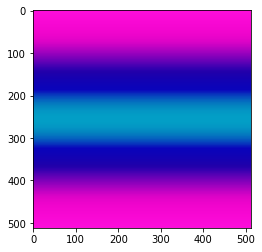

In [22]:
plt.imshow(txt)

In [20]:
h = 0.01
nsteps = 10**4
for step in range(nsteps):
    time_step(texture=txt, h = 0.01, zero_txt=zero_txt)
    tme += h
    printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)
beep(1)
print(f"the time is tme = {tme}.")

Progress: |██████████████████████████████████████████████████| 100.0% Complete
the time is tme = 100.00000000001425.


In [30]:
save_fn = f"ic_{txt.shape[1]}x{txt.shape[0]}_t={0}.npz"
print(save_fn)
np.savez_compressed(f'{nb_dir}/Data/{save_fn}', txt)

ic_512x512_t=0.npz


# TODO: add a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

In [31]:
data_dir = f'{nb_dir}/Data/ic_512x512_t=0.npz'
txt = np.load(data_dir)['arr_0']

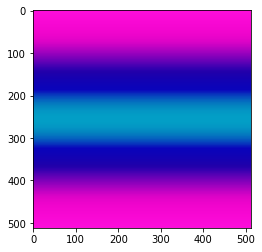

In [33]:
plt.imshow(txt)

In [16]:
np.mean(txt[0,...], axis=0)

array([3.96356133e-08, 9.61024365e-01, 8.56769987e-01])

In [17]:
np.mean(txt[30,...], axis=0)

array([1.56246950e-04, 9.61024365e-01, 8.56769987e-01])

In [23]:
np.mean(txt[100,...], axis=0)

array([0.6113279 , 0.00778823, 0.74541424])

In [19]:
np.mean(txt[256,...], axis=0)

array([0.51121126, 0.01076001, 0.46970635])

In [33]:
# test cases of periodic boundary conditions on a random matrix
test = np.random.rand(111,111,3)
# trivial tests, do nothing/ slots agree
(pbc(test,1,2)==test[1,2]).all()
not (pbc(test,2,1)==test[1,2]).all()

True

In [ ]:
#test first pbc slot

(pbc(test,-1,2)==test[110,2]).all() # test left
# (pbc(test,111,2)==test[0,2]).all()  # test right
# (pbc(test,112,2)==test[0,2]).all()  # test top


In [17]:
(pbc(test,-1,-1)==test[511,511]).all()

True

In [ ]:
pbc(test,-1,-1)

In [ ]:
pbc(test,-1,-1)

In [288]:
test.shape
np.tan(theta)*dtb

NameError: name 'test' is not defined

# TODO: add a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

In [36]:
#why was there stimulus forming at the top/bottom of the canvas?
# --> ah, pbc's were broken.  oh well...  fixed now.
from skimage import draw

In [216]:
circle_coords = draw.circle(r=100, c=100, radius=100, shape=(512,512,3))

In [217]:
# txt[circle_coords]

In [218]:
rm = 100; cm = 200; #same as circle center
deg   = 45 # number of degrees semicircle is cut by
theta = deg/180*np.pi
xm = rm; ym = cm;

In [219]:
# ^make a boolean index for "to the left of" this line

In [220]:
#dist to top
dtt = ym
#dist to bottom
dtb = txt.shape[1]-ym-1
#use trig to get dist to sides
dst = int(np.around(np.tan(theta)*dtt))
dsb = int(np.around(np.tan(theta)*dtb))

In [221]:
# compute initial point and final point of line that goes through the circle's center
r0 = 0; c0 = xm - dst
r1 = txt.shape[1]-1; c1 = xm + dsb
# draw that circle
line = draw.line(r0, c0, r1, c1)

In [222]:
# make the desired coordinate meshes
# and make the desired boolean mesh for "left of line"
#TODO: @njit this all, because its already basically there
img = 0*txt[...,0].copy()
txtx = img.copy()
txty = img.copy()
for y in range(txt.shape[0]):
    l = line[0][y]
    for x in range(txt.shape[1]):
        txtx[x,y] = x
        txty[x,y] = y   
        if x<l:
            img[y,x] = 100

In [223]:
########################################################
#######NEARLY WORKING NJITABLE SEMICIRCLE DRAWER #######
########################################################

img = 0*txt[...,0].copy()
for y in circle_coords[0]:
    l = line[0][y]
    for x in circle_coords[1]:
        if x<l:
            img[y,x] = 256

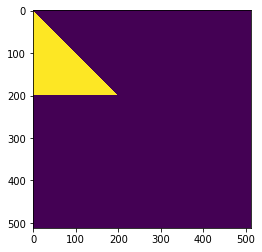

In [224]:
plt.imshow(img)

# for rowy, rowl in zip(txty, line):
#     rowy < rowl
#generate a texture of pixel coordinates
# xt = np.arange()

In [207]:
# I don't need to @njit this step until a long time from now at least...
# img = 0*txt.copy()
# for j, row in enumerate(a):
#     l = a[j]
#     for i in row:
#         x = row[i]
#         if x<l: 
#             img[j,i] = 1 
img[:3,:3]

array([[  0., 100., 100.],
       [  0.,   0., 100.],
       [  0.,   0.,   0.]])

In [225]:
# np.less_equal(x1=txtx, x2=a, where=True)
beep(13)

0

In [138]:
a = np.array(line).T

In [141]:
img = 0*txt[...,0].copy()
# for j, l, row in enumerate(zip(list(line[0]), txty)):
for j, l, row in enumerate(zip(line, txty)):
    boo = row<l
    img[j,:]

ValueError: not enough values to unpack (expected 3, got 2)

In [178]:
# for row in line:
#     l = row

In [270]:
from numba import njit
from numba.typed import List
import numpy as np
@njit
def rescale_score(x):
    '''x is float.  maps [0,1] to [-1,1].'''
    return 2.*(x-0.5)
@njit
def rescale_scores(score_list):
    lst = List()
    for x in score_list:
        lst.append(rescale_score(x))
    return lst
%timeit
retval = list(rescale_scores(np.linspace(0,1,10**6)))

In [284]:
plt.savefig?

# get method from trimesh used to calculate volume

In [286]:
!pip3 install trimesh

     |████████████████████████████████| 614 kB 2.3 MB/s eta 0:00:01


In [337]:
import trimesh
from lib.operari import *
import inspect

In [338]:
file_name = 'ic_600x600.101.npz'
file_dir = find_files(file_name, search_path=nb_dir)
if len(file_dir)==0: raise('file not found')
# print(
file_dir=file_dir[0]
# )
# print(sys.path.exists(file_dir))

In [339]:
# generate load_mesh from .npz array
txt = np.load(file_dir)['arr_0']

In [340]:
# #make a log folder
make_log_folder(folder_name='Data/log-tmp/')

^that folder probs existed already.


In [341]:
print(inspect.getsource(trimesh.creation.faces_to_edges))

def faces_to_edges(faces, return_index=False):
    """
    Given a list of faces (n,3), return a list of edges (n*3,2)

    Parameters
    -----------
    faces : (n, 3) int
      Vertex indices representing faces

    Returns
    -----------
    edges : (n*3, 2) int
      Vertex indices representing edges
    """
    faces = np.asanyarray(faces)

    # each face has three edges
    edges = faces[:, [0, 1, 1, 2, 2, 0]].reshape((-1, 2))

    if return_index:
        # edges are in order of faces due to reshape
        face_index = np.tile(np.arange(len(faces)),
                             (3, 1)).T.reshape(-1)
        return edges, face_index
    return edges



trimesh.base.Trimesh

In [347]:
# print(inspect.getsource(trimesh.Trimesh.))
#     trimesh.Trimesh.mass_properties
trimesh.Trimesh.volume

In [ ]:
trimesh.

# TODO: on UB: move the computational geometry ipynbs and lib from rapids-notebook/'trimesh work' over here to python/notebooks/

# TODO: test whether trimesh.Trimesh.area and trimesh.Trimesh.volume can reproduce the right ratio for a sphere.

# TODO: What sized cube yields a unit volume output? Hint: what's the volume for a right tetrahedron?

# (and then) TODO: find out this "surface integral" that functionaly produces the volume of a watertight triangular mesh